In [1]:
data = [[-6.5, -2.0, -2.5],
        [-6.5, -2.0, 2.5],
        [-6.5, 0.5, 2.5],
        [-6.5, 0.5, -2.5],
        [-2.5, 0.5, -2.5],
        [-2.5, 0.5, 2.5],
        [-0.75, 2.0, -2.5],
        [-0.75, 2.0, 2.5],
        [3.25, 2.0, -2.5],
        [3.25, 2.0, 2.5],
        [4.5, 0.5, -2.5],
        [4.5, 0.5, 2.5],
        [6.5, 0.5, -2.5],
        [6.5, 0.5, 2.5],
        [6.5, -2.0, 2.5],
        [6.5, -2.0, -2.5]]
D = Matrix(zip(*data)).stack(Matrix((1,)*len(data)))
ADJ = Matrix(len(data), [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

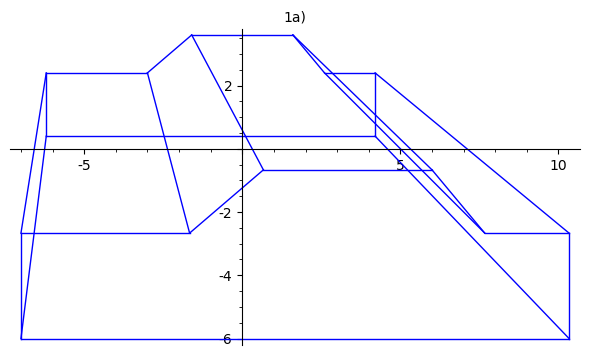

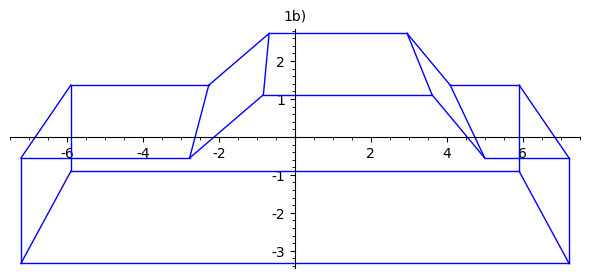

In [2]:
# Problem 1
def project_data(D, ADJ, p):
    """Project the wireframe described by D and ADJ onto the x-y-plane with the viewpoint p
    
    :param D:   A 4xn matrix of regular coordinates of n points in R^3
    :param ADJ: A symmetric nxn matrix of ones and zeroes where ADJ_ij == 1 if the there is a 
                line betweeen D[i] and D[j]
    :param p:   A vector in R^3 describing the viewpoint from wich the wireframe is projected 
                the x-y-plane
    """
    # Extract the viewpoint coordinates
    b, c, d = p
    # Create the projection matrix
    P = Matrix(4,4, [1, 0, -b/d, 0, 0, 1, -c/d, 0, 0, 0, 0, 0, 0, 0, -1/d, 1])
    # Calculate the projected points by nomalizing the columns of P*D by the fourth coordate 
    # and extracting the first two
    points = [c[0:2]/c[3] for c in (P*D).columns()]
    # Create a set of point tuples representing lines by iterating over the upper triangle of ADJ
    lines = line2d([], aspect_ratio=1)
    for i in range(len(data)):
        for j in range(i, len(data)):
            if ADJ[i, j] == 1:
                lines += line2d((points[i], points[j]))
    # Return the lines object
    return lines

# a)
show(project_data(D, ADJ, (-5, 10, 10)), title='1a)', aspect_ratio=1)
# b)
show(project_data(D, ADJ, (0, 10, 25)), title='1b)', aspect_ratio=1)

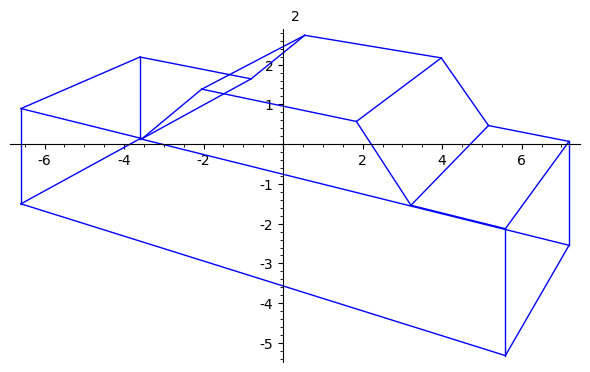

In [3]:
# Problem 2
angle = 30*pi/180
# Create a rotation transform T
def create_rotation_matrix(angle_x=0, angle_y=0, angle_z=0):
    Tx = Matrix([[1,            0,             0, 0],
                 [0, cos(angle_x), -sin(angle_x), 0],
                 [0, sin(angle_x),  cos(angle_x), 0],
                 [0,            0,             0, 1]])
    Ty = Matrix([[cos(angle_y), 0, -sin(angle_y), 0],
                 [           0, 1,             0, 0],
                 [sin(angle_y), 0,  cos(angle_y), 0],
                 [           0, 0,             0, 1]])
    Tz = Matrix([[cos(angle_z), -sin(angle_z), 0, 0],
                 [sin(angle_z),  cos(angle_z), 0, 0],
                 [           0,             0, 1, 0],
                 [           0,             0, 0, 1]])
    return Tz*Ty*Tx
T = create_rotation_matrix(angle_y=angle)
# Then project TD
show(project_data(T*D, ADJ, (0, 10, 25)), title='2', aspect_ratio=1)
# Which shows the car rotated 30 degrees around the y axis, which in this case is the 'vertical'

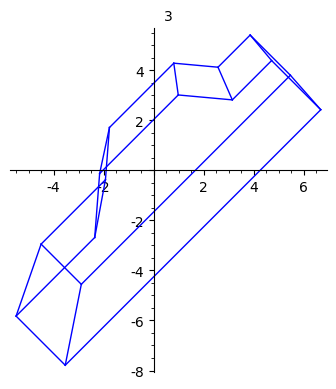

In [4]:
# Problem 3
# Create the rotation transform
T = create_rotation_matrix(angle_z=45*pi/180)
# shoe the projection of the rotated data
show(project_data(T*D, ADJ, (0, 10, 25)), title='3', aspect_ratio=1)
# Here the car is displayed rotated around the horizontal axis perpendicular to the driving direction
# or in other words 'pitched down'

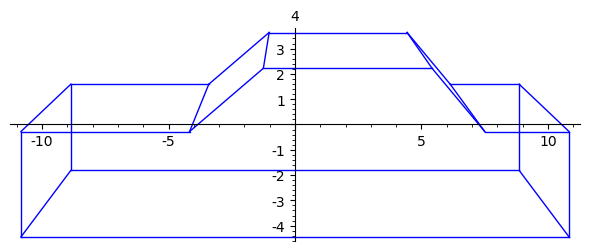

In [6]:
# Problem 4
# Modify the projection matrix from problem 1 to introduce a zoom argument
def project_data(D, ADJ, p, zoom=1):
    """Project the wireframe described by D and ADJ onto the x-y-plane with the viewpoint p
    
    :param D:    A 4xn matrix of regular coordinates of n points in R^3
    :param ADJ:  A symmetric nxn matrix of ones and zeroes where ADJ_ij == 1 if the there is a 
                 line betweeen D[i] and D[j]
    :param p:    A vector in R^3 describing the viewpoint from wich the wireframe is projected 
                 the x-y-plane
    :param zoom: A scalar indication zoom as a fraction
    """
    # Extract the viewpoint coordinates
    b, c, d = p
    # Create the projection matrix
    P = Matrix(4,4, [zoom, 0, -b/d, 0, 0, zoom, -c/d, 0, 0, 0, 0, 0, 0, 0, -1/d, 1])
    # Calculate the projected points by nomalizing the columns of P*D by the fourth coordate 
    # and extracting the first two
    points = [c[0:2]/c[3] for c in (P*D).columns()]
    # Create a set of point tuples representing lines by iterating over the upper triangle of ADJ
    lines = line2d([])
    for i in range(len(data)):
        for j in range(i, len(data)):
            if ADJ[i, j] == 1:
                lines += line2d((points[i], points[j]))
    # Return the lines object
    return lines
# Then use it to display a 150% zoomed version of 1b
show(project_data(D, ADJ, (0, 10, 25), zoom=1.5), title='4', aspect_ratio=1)
# Since the axes of the plot are scaled to the same size on the page, the only visible difference 
# here is the numbers on the axes being larger